In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('Py-DS-ML-Bootcamp-master/Refactored_Py_DS_ML_Bootcamp-master/15-Decision-Trees-and-Random-Forests/loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


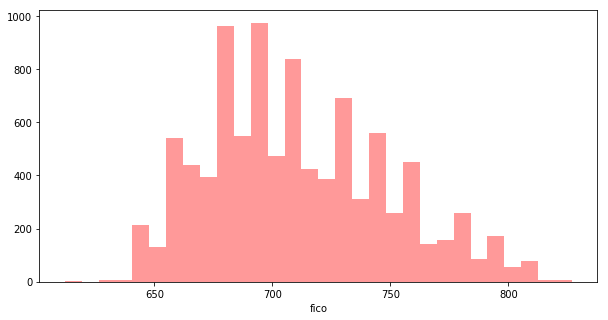

In [6]:
plt.figure(figsize=(10,5))
sns.distplot(df['fico'],kde=False, bins=30, color='red')

Text(0.5,0,'FICO')

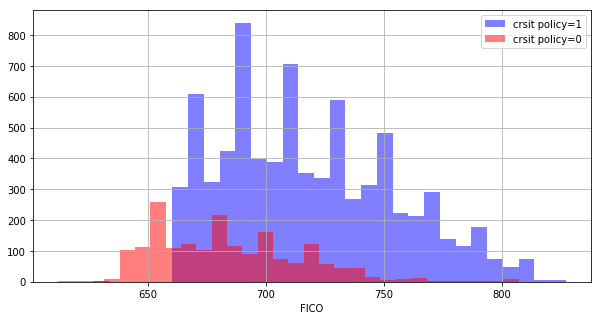

In [7]:
plt.figure(figsize=(10,5))
df[df['credit.policy']==1]['fico'].hist(bins=30,alpha=0.5,color='blue',label='crsit policy=1')
df[df['credit.policy']==0]['fico'].hist(bins=30,alpha=0.5,color='red',label='crsit policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5,0,'FICO')

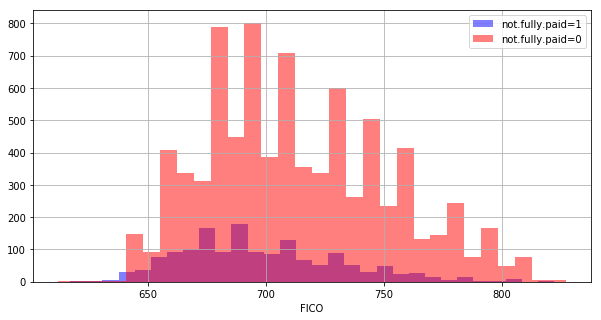

In [8]:
plt.figure(figsize=(10,5))
df[df['not.fully.paid']==1]['fico'].hist(bins=30,alpha=0.5,color='blue',label='not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(bins=30,alpha=0.5,color='red',label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

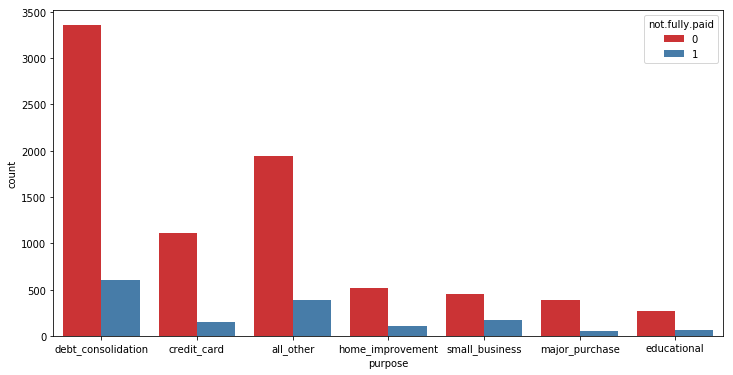

In [9]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=df,palette='Set1')

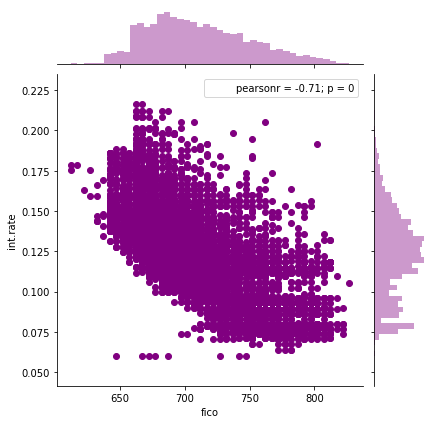

In [10]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

<Figure size 792x504 with 0 Axes>

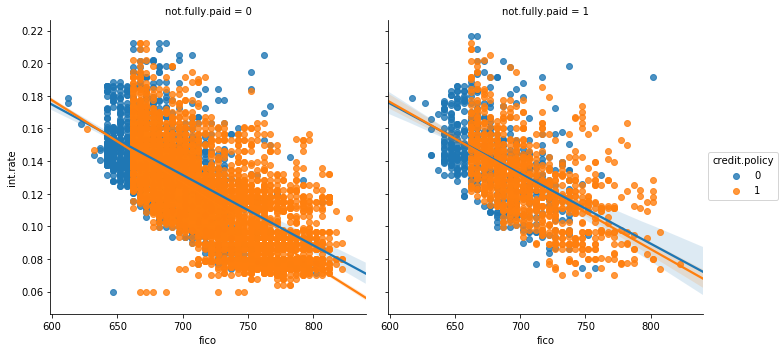

In [11]:
plt.figure(figsize=(11,7))
sns.lmplot(x='fico',y='int.rate',data=df,hue='credit.policy',col='not.fully.paid')

In [12]:
df.isnull().count()

credit.policy        9578
purpose              9578
int.rate             9578
installment          9578
log.annual.inc       9578
dti                  9578
fico                 9578
days.with.cr.line    9578
revol.bal            9578
revol.util           9578
inq.last.6mths       9578
delinq.2yrs          9578
pub.rec              9578
not.fully.paid       9578
dtype: int64

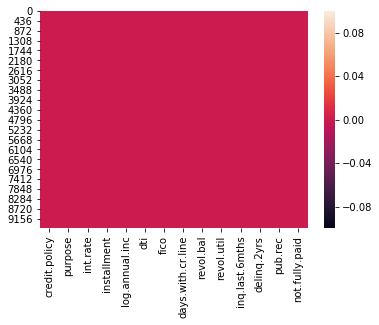

In [13]:
sns.heatmap(df.isnull())

In [14]:
df2 = pd.get_dummies(df,columns=['purpose'],drop_first=True)

In [15]:
df2.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [16]:
from sklearn.model_selection import train_test_split
X, X1, y, y1 = train_test_split(df2.drop('not.fully.paid',axis=1), df['not.fully.paid'], test_size=0.3, random_state=101)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop('not.fully.paid',axis=1), df['not.fully.paid'], test_size=0.3, random_state=101)

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
print(classification_report(y_test, dtreepred))

             precision    recall  f1-score   support

          0       0.86      0.82      0.84      2431
          1       0.20      0.24      0.22       443

avg / total       0.75      0.73      0.74      2874



In [21]:
print(confusion_matrix(y_test, dtreepred))

[[1995  436]
 [ 336  107]]


In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=120)
rf.fit(X_train, y_train)
rfpred = rf.predict(X_test)
print(classification_report(y_test, rfpred))
print(confusion_matrix(y_test, rfpred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.62      0.02      0.04       443

avg / total       0.81      0.85      0.78      2874

[[2425    6]
 [ 433   10]]


In [23]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train, y_train)
lgpred = lg.predict(X_test)
print(classification_report(y_test, lgpred))
print(confusion_matrix(y_test, lgpred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.53      0.02      0.04       443

avg / total       0.80      0.85      0.78      2874

[[2423    8]
 [ 434    9]]


In [24]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train, y_train)
knpred = kn.predict(X_test)
print(classification_report(y_test, knpred))
print(confusion_matrix(y_test, knpred))

             precision    recall  f1-score   support

          0       0.85      0.93      0.89      2431
          1       0.20      0.10      0.13       443

avg / total       0.75      0.80      0.77      2874

[[2252  179]
 [ 398   45]]


In [25]:
#plt.scatter(y_test, knpred)

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [27]:
kn = KNeighborsClassifier(n_neighbors=5)
score = cross_val_score(kn, X, y, cv=10, scoring='accuracy')
score

array([0.82265276, 0.82265276, 0.81669151, 0.81669151, 0.79701493,
       0.8119403 , 0.81343284, 0.80597015, 0.80895522, 0.81940299])

In [28]:
score.mean()

0.8135404942500613

In [29]:
k_range = list(range(1,31))
scoring = ['accuracy', 'recall']
k_score = []
for k in k_range:
    kn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(kn, X, y, cv=10, scoring='accuracy')
    k_score.append(score.mean())
print(k_score)

[0.7401530351224503, 0.8190626598749917, 0.7905694330137687, 0.8257741842204773, 0.8135404942500613, 0.8315904086126743, 0.8272642747514294, 0.8344260070734257, 0.8323375670084747, 0.8347247369708833, 0.8330845029695041, 0.8365148920079186, 0.8357688457859732, 0.8368136219053763, 0.836664368174033, 0.837261383099406, 0.837261383099406, 0.8374104143959784, 0.8374104143959784, 0.8374104143959784, 0.8374104143959784, 0.8374104143959784, 0.8374104143959784, 0.8374104143959784, 0.8374104143959784, 0.8374104143959784, 0.8374104143959784, 0.8374104143959784, 0.8374104143959784, 0.8374104143959784]


In [30]:
max(k_score)

0.8374104143959784

In [31]:
for i in range(1,31):
    print(i, k_score[i-1])
    i+=1


1 0.7401530351224503
2 0.8190626598749917
3 0.7905694330137687
4 0.8257741842204773
5 0.8135404942500613
6 0.8315904086126743
7 0.8272642747514294
8 0.8344260070734257
9 0.8323375670084747
10 0.8347247369708833
11 0.8330845029695041
12 0.8365148920079186
13 0.8357688457859732
14 0.8368136219053763
15 0.836664368174033
16 0.837261383099406
17 0.837261383099406
18 0.8374104143959784
19 0.8374104143959784
20 0.8374104143959784
21 0.8374104143959784
22 0.8374104143959784
23 0.8374104143959784
24 0.8374104143959784
25 0.8374104143959784
26 0.8374104143959784
27 0.8374104143959784
28 0.8374104143959784
29 0.8374104143959784
30 0.8374104143959784


Text(0,0.5,'accuracy')

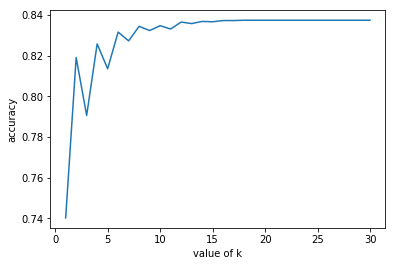

In [32]:
plt.plot(k_range, k_score)
plt.xlabel('value of k')
plt.ylabel('accuracy')

In [51]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=18)
kn.fit(X_train, y_train)
knpred = kn.predict(X_test)
print(classification_report(y_test, knpred))
print(confusion_matrix(y_test, knpred))

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.00      0.00      0.00       443

avg / total       0.72      0.85      0.78      2874

[[2431    0]
 [ 443    0]]


In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = dict(n_neighbors=k_range)

In [45]:
k_range = list(range(1,31))
param_grid = dict(n_neighbors=k_range)
kn = KNeighborsClassifier()
kgrid = GridSearchCV(kn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

In [46]:
%time kgrid.fit(X, y)

CPU times: user 4.21 s, sys: 747 µs, total: 4.21 s
Wall time: 4.44 s


GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [47]:
pd.DataFrame(kgrid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.740155,0.013527,{'n_neighbors': 1}
1,0.819063,0.006346,{'n_neighbors': 2}
2,0.790573,0.008757,{'n_neighbors': 3}
3,0.825776,0.003827,{'n_neighbors': 4}
4,0.813544,0.007578,{'n_neighbors': 5}
5,0.831593,0.004922,{'n_neighbors': 6}
6,0.827267,0.005546,{'n_neighbors': 7}
7,0.834427,0.003047,{'n_neighbors': 8}
8,0.832339,0.004013,{'n_neighbors': 9}
9,0.834726,0.002249,{'n_neighbors': 10}


In [48]:
from sklearn.tree import DecisionTreeClassifier
k_range = ['gini']
param_grid = dict(criterion=k_range)
dtree = DecisionTreeClassifier()
kgrid = GridSearchCV(dtree, param_grid, cv=10, scoring='accuracy', return_train_score=False)

In [49]:
%time kgrid.fit(X, y)

CPU times: user 722 ms, sys: 0 ns, total: 722 ms
Wall time: 895 ms


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['gini']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=False, scoring='accuracy', verbose=0)

In [50]:
pd.DataFrame(kgrid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.744779,0.012744,{'criterion': 'gini'}


In [42]:
print(kgrid.best_score_)
print(kgrid.best_params_)
print(kgrid.best_estimator_)

0.7485083532219571
{'criterion': 'gini'}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


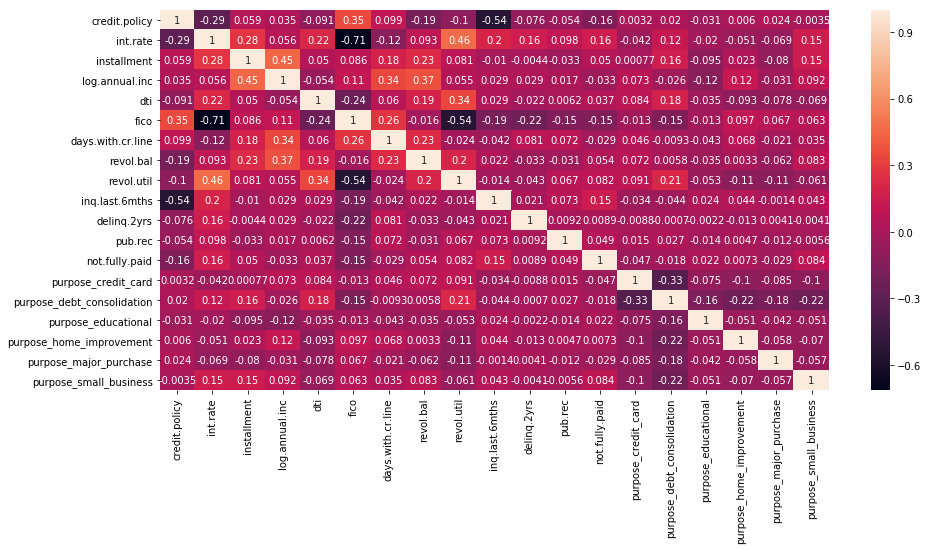

In [52]:
plt.figure(figsize=(15,7))
sns.heatmap(df2.corr(),annot=True)